#📌 Extracão

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [ ]:
df_cliente = pd.json_normalize(df['customer'])
df_telefone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_conta = pd.json_normalize(df['account'])

df = pd.concat([df[['customerID', 'Churn']], df_cliente, df_telefone, df_internet, df_conta], axis=1)

df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#verificando se há valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
#verificando registros duplicados
df.duplicated(subset=['customerID']).sum()

np.int64(0)

In [ ]:
#verificando valores únicos em cada coluna
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [ ]:
# 1. Convertendo Charges.Total
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df = df[df['Churn'] != ''].copy()
df = df.dropna(subset=['Charges.Total', 'Churn'])

#Criando a coluna Contas_Diarias
df['Contas_Diarias'] = (df['Charges.Monthly'] / 30).round(2)

In [ ]:
#Criando a coluna Contas_Diarias
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
df['Contas_Diarias']= df['Contas_Diarias'].round(2)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


#📊 Carga e análise

In [ ]:
#média, moda, mediana, desvio padrão e medidas estatísiticas
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [ ]:
#incluindo todas as colunas
df.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
count,7032,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032.000000
unique,7032,2,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,NaN
freq,1,5163,3549,NaN,3639,4933,NaN,6352,3385,3096,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,2.159891
std,NaN,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,1.002955
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.610000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,1.187500
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,2.340000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,2.992500


/tmp/ipython-input-158/3370333550.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


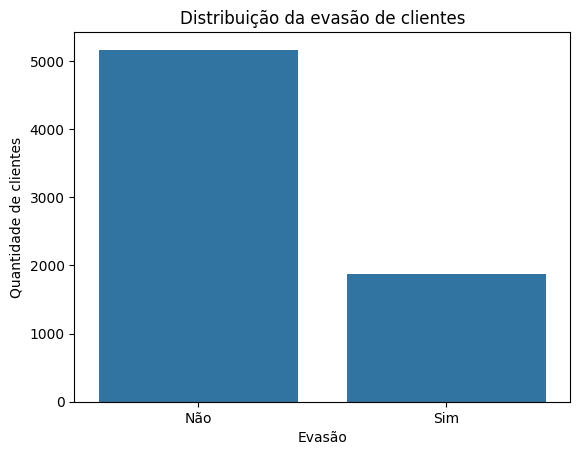

In [ ]:
# Distribuição da evasão de clientes
contagem_churn = df['Churn'].value_counts()
fig, ax = plt.subplots()
sns.barplot(x=contagem_churn.index, y=contagem_churn.values, ax=ax)
ax.set_title('Distribuição da evasão de clientes')
ax.set_xlabel('Evasão')
ax.set_ylabel('Quantidade de clientes')
ax.set_xticklabels(['Não', 'Sim'])

plt.show()

In [ ]:
#Contagem de evasão por colunas categóricas
colunas_categoricas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                               'PaperlessBilling', 'PaymentMethod']
numero_colunas = 3
numero_linhas = (len(colunas_categoricas) + numero_colunas - 1) // numero_colunas
fig, axes = plt.subplots(numero_linhas, numero_colunas, figsize=(15, numero_linhas * 5))
axes = axes.flatten()


for i, col in enumerate(colunas_categoricas):
    if i < len(axes):
        churn_by_category = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
        churn_by_category['Yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Churn Rate by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Churn Rate')
        axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
for i, col in enumerate(colunas_categoricas):
    if i < len(axes):
        # Gerando a tabela de proporção
        churn_by_category = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)

        # Garantindo que 'Yes' existe no resultado
        if 'Yes' in churn_by_category.columns:
            churn_by_category['Yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[i], color='#3498db')
        else:
            axes[i].text(0.5, 0.5, 'Sem dados "Yes"', ha='center', va='center', transform=axes[i].transAxes)

        axes[i].set_title(f'Churn Rate by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Churn Rate')
        axes[i].tick_params(axis='x', rotation=45)

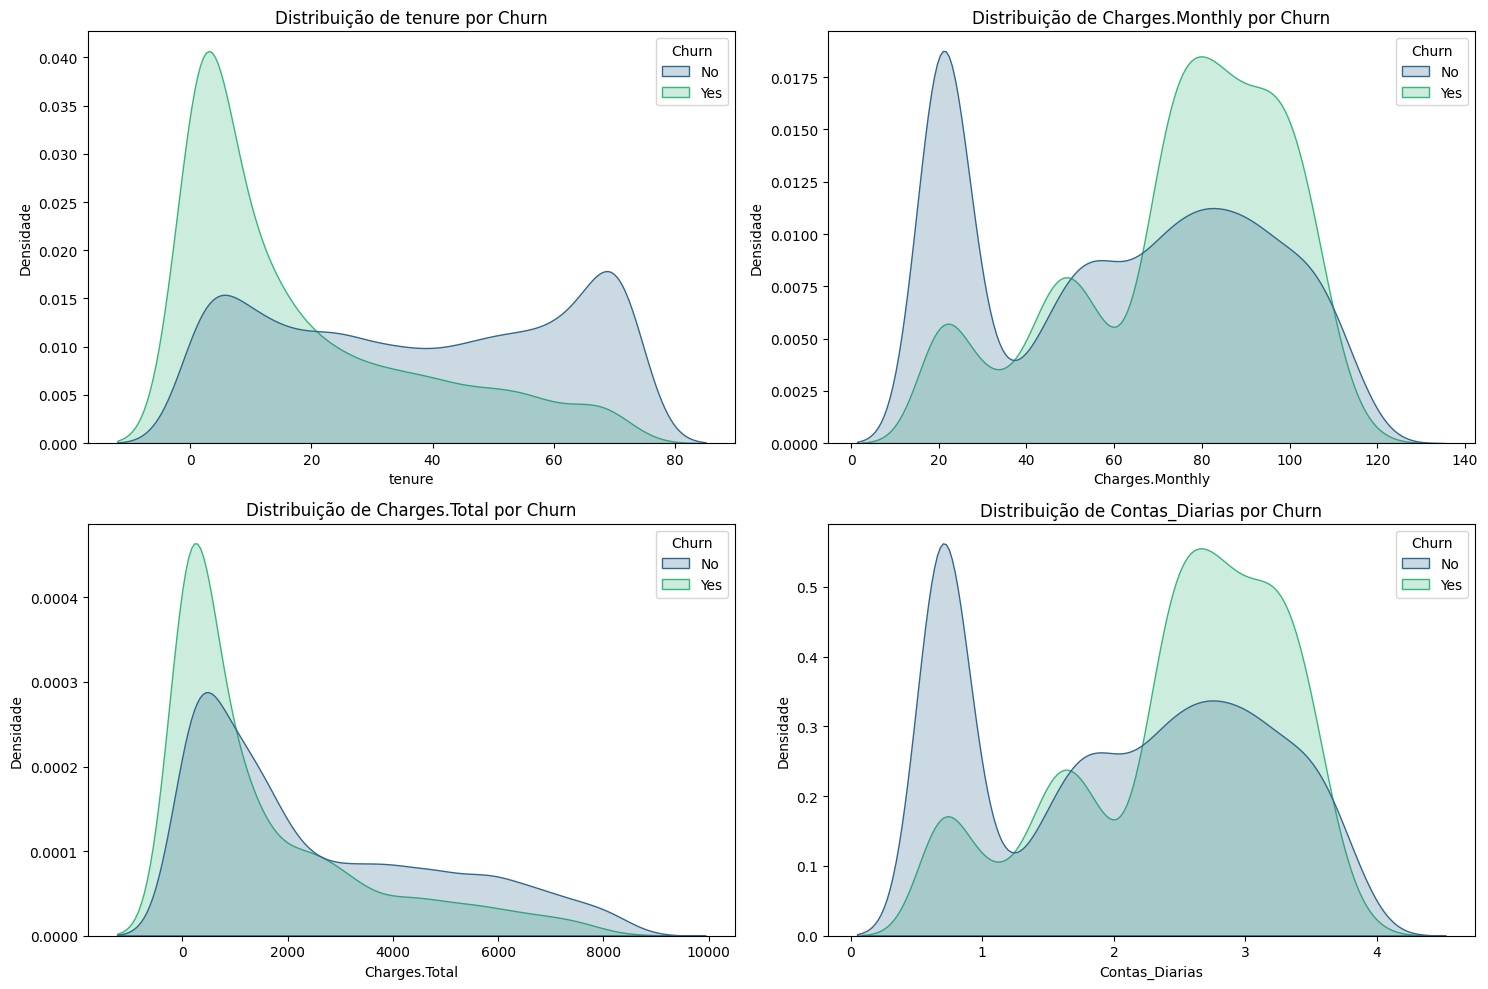

In [ ]:
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(colunas_numericas):
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, common_norm=False, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribuição de {col} por Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

#📄Relatorio Final

1. Introdução

Este projeto busca analisar a evasão de clientes (churn) da empresa TelecomX_BR. Diante de um alto número de cancelamento de serviços, buscamos compreender os principais fatores para a perda de clientes. O projeto utilizou a linguagem Python e três de suas principais bibliotecas para manipulação de dados e criação de gráficos: Seaborn, Matplotlib e Pandas.

Etapas do projeto:
•	Importação e manipulação de dados provenientes de uma API.

•	Aplicação dos conceitos de ETL (Extração, Transformação e Carga) para preparação dos dados.

•	Criação de gráficos para destacar padrões e tendências e auxiliar na compreensão dos dados.

•	Realização de uma Análise Exploratória de Dados (EDA) e elaboração de um relatório com insights relevantes para embasar ações e estratégias de retenção de clientes.

2. Limpeza e Tratamento de Dados

Os dados do projeto foram importados através do carregamento de um arquivo .json.

•	Organização: A primeira etapa consistiu em normalizar os dados aninhados (customer, phone, internet, account) para gerar uma tabela única e limpa.

•	Tipagem e Correção: Foi realizada a conversão da coluna Charges.Total para o formato numérico, tratando valores vazios que impediam a análise estatística.

•	Novas Variáveis: Na segunda etapa, foi criada a coluna "Contas_Diarias" (calculada a partir da mensalidade dividida por 30), a fim de preparar os dados para uma análise de custo por dia.

•	Filtragem: Registros com valores em branco no campo de Churn foram identificados e tratados para garantir a integridade dos gráficos.

3. Análise Exploratória de Dados (EDA)

Nesta fase, cruzamos o status de Churn com diferentes variáveis para identificar comportamentos:

•	Distribuição Geral: Identificamos a proporção entre clientes ativos e os que cancelaram o serviço.

•	Variáveis Categóricas: Analisamos o impacto de fatores como tipo de contrato e métodos de pagamento. Observou-se que certas categorias possuem uma taxa de evasão significativamente maior.

•	Variáveis Numéricas (KDE Plots):

o	Tenure: Notou-se uma alta concentração de cancelamentos em clientes com poucos meses de contrato.

o	Mensalidades: Clientes com cobranças mensais mais altas tendem a apresentar maior densidade de evasão.

4. Conclusões e Insights

•	Ponto Crítico: O tempo de permanência (tenure) é o principal indicador; clientes novos são muito mais propensos a sair do que clientes antigos.

•	Custo Mensal: Existe uma correlação visual entre contas mais altas e o aumento na taxa de churn.

•	Qualidade dos Dados: A identificação de valores vazios em clientes com zero meses de contrato sugere que a evasão pode ocorrer antes mesmo do primeiro ciclo de faturamento completo.

5. Recomendações:

•	Retenção Preventiva: Focar em campanhas de fidelização para clientes nos primeiros 6 meses de contrato.

•	Incentivo à Fidelidade: Oferecer benefícios para clientes que migrarem de contratos mensais para planos anuais.

•	Revisão de Preços: Avaliar a competitividade das mensalidades para clientes de alto valor que apresentam maior risco de saída.


